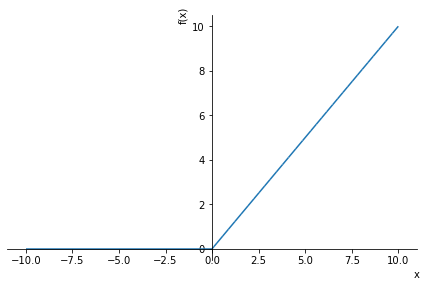

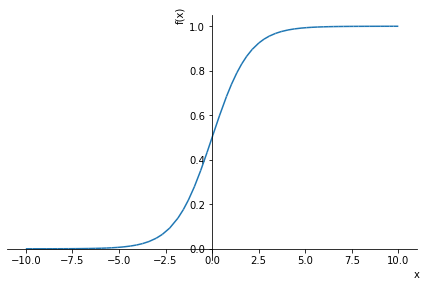

In [1]:
# plotting ReLU activation function and Logistic activation function

from sympy import *

x = symbols('x')

relu = Max(0, x)
plot(relu)

logistic = 1 / (1 + exp(-x))
plot(logistic)

In [2]:
# A simple forward propagation network with random weight and bias values

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

all_data = pd.read_csv('https://tinyurl.com/y2qmhfsr')

# extract the input columns, scale down by 255
all_inputs = (all_data.iloc[:, 0:3].values / 255.0)
all_outputs = all_data.iloc[:, 3].values

# split train & test data sets
X_train, X_test, Y_train, Y_test = train_test_split(all_inputs, all_outputs, test_size = 1/3, stratify=all_outputs)
n = X_train.shape[0]  # no. of training records

# build the simple neural network with weights and biases with random initialization
w_hidden = np.random.rand(3, 3)
w_output = np.random.rand(1, 3)

b_hidden = np.random.rand(3, 1)
b_output = np.random.rand(1, 1)

# print the Weights and Biases
print('Weight_hidden values: \n{0}'.format(w_hidden))
print('Weight_output values: \n{0}'.format(w_output))
print('Biases_hidden values: \n{0}'.format(b_hidden))
print('Biases_output values: \n{0}'.format(b_output))

# setting up Activation Functions
relu = lambda x: np.maximum(x, 0)
logistic = lambda x: 1 / (1 + np.exp(-x))

# runs inputs through the neural network to get predicted outputs
def forward_propagation(X):
    Z1 = w_hidden @ X + b_hidden
    A1 = relu(Z1)
    Z2 = w_output @ A1 + b_output
    A2 = logistic(Z2)
    print('Z1 matrix: \n{0}'.format(Z1))
    print('A1 matrix: \n{0}'.format(A1))
    print('Z2 matrix: \n{0}'.format(Z2))
    print('A2 matrix: \n{0}'.format(A2))
    return Z1, A1, Z2, A2


# calculate Accuracy 
test_predictions = forward_propagation(X_test.transpose())[3]  # grab only output layer A2
test_comparisons = np.equal((test_predictions >= 0.5).flatten().astype(int), Y_test)  # only grab the A2 vector with predictions >= 0.5
accuracy = sum(test_comparisons.astype(int) / X_test.shape[0]) # percentage of correct predictions

print('Accuracy : {0:.5f}'.format(accuracy))  # flipping a coin yields 0.5 accuracy, hence our random weights & biases might as well be due to random chance. 

Weight_hidden values: 
[[0.20102728 0.48066143 0.58141726]
 [0.11390032 0.01698575 0.67570942]
 [0.70759789 0.97151094 0.76088998]]
Weight_output values: 
[[0.20617938 0.71285385 0.36712997]]
Biases_hidden values: 
[[0.1629954 ]
 [0.46413461]
 [0.90565405]]
Biases_output values: 
[[0.69267979]]
Z1 matrix: 
[[1.16177348 0.69300458 0.40426859 ... 1.05346377 0.64090267 0.49408401]
 [1.10170833 0.80258841 0.47266079 ... 0.92588525 0.58069964 0.58263108]
 [2.84004681 1.92949669 1.39331444 ... 2.64166133 2.15279516 1.87613137]]
A1 matrix: 
[[1.16177348 0.69300458 0.40426859 ... 1.05346377 0.64090267 0.49408401]
 [1.10170833 0.80258841 0.47266079 ... 0.92588525 0.58069964 0.58263108]
 [2.84004681 1.92949669 1.39331444 ... 2.64166133 2.15279516 1.87613137]]
Z2 matrix: 
[[2.76023683 2.11606733 1.62449718 1.44395136 2.91142392 2.59875897
  2.34618189 1.70193527 2.87640864 1.81453616 2.01450211 1.7126687
  2.28427575 2.86283546 2.9103862  2.9103862  2.62903816 2.12723414
  2.80855045 2.85097663 2

In [3]:
# calculating all the partial derivatives we need for our neural network based on the Cost Function C. 
# multiplying the gradients together to get a measure of how much a change to W2 will change the cost function C. 

from sympy import *

W1, W2, B1, B2, A1, A2, Z1, Z2, X, Y = symbols('W1 W2 B1 B2 A1 A2 Z1 Z2 X Y')

# calculating derivative of Cost Function C with respect to A2
C = (A2 - Y)**2
dC_dA2 = diff(C, A2)
print('dC/dA2: \n{0}'.format(dC_dA2))

# calculating derivative of A2 with respect to Z2
logistic = lambda x: 1 / (1 + exp(-x))
A2 = logistic(Z2)
dA2_dZ2 = diff(A2, Z2)  # taking the derivative of a Sigmoid curve
print('dA2/dZ2: \n{0}'.format(dA2_dZ2))

# calculating the derivative of Z2 with respect to W2
Z2 = W2 * A1 + B2
dZ2_dW2 = diff(Z2, W2)
print('dZ2/dW2: \n{0}'.format(dZ2_dW2))

# calculating the derivative of Z2 with respect to A1
Z2 = W2 * A1 + B2
dZ2_dA1 = diff(Z2, A1)
print('dZ2/dA1: \n{0}'.format(dZ2_dA1))

# calculating the derivative of Z2 with respect to A1
Z2 = W2 * A1 + B2
dZ2_dB2 = diff(Z2, B2)
print('dZ2/dB2: \n{0}'.format(dZ2_dB2))

# calculating the derivative of A1 with respect to Z1
relu = lambda x: Max(x,0)
d_relu = lambda x: x > 0. # Slope is 1 if positive, 0 if negative
A1 = relu(Z1)
dA1_dZ1 = d_relu(Z1)
print('dA1/dZ1: \n{0}'.format(dA1_dZ1))

# calculating the derivative of Z1 with respect to W1
Z1 = W1 * X + B1
dZ1_dW1 = diff(Z1, W1)
print('dZ1/dW1: \n{0}'.format(dZ1_dW1))

# calculating the derivative of Z1 with respect to B1
Z1 = W1 * X + B1
dZ1_dB1 = diff(Z1, B1)
print('dZ1/dB1: \n{0}'.format(dZ1_dB1))

# calculating C with respect to W2
dC_dW2 = dC_dA2 * dA2_dZ2 * dZ2_dW2
print('dC/dW2: \n{0}'.format(dC_dW2))

# calculating C with respect to B2
dC_dB2 = dC_dA2 * dA2_dZ2 * dZ2_dB2
print('dC/dB2: \n{0}'.format(dC_dB2))

# calculating C with respect to W1
# dC_dW1 = dC_dA2 * dA2_dZ2 * dZ2_dA1 * dA1_dZ1 * dZ1_dW1  # showing error as unsupported operand type(s) for *: 'Mul' and 'StrictGreaterThan'
# print('dC/dW1: \n{0}'.format(dC_dW1))

# calculating C with respect to B1
# dC_dB1 = dC_dA2 * dA2_dZ2 * dZ2_dA1 * dA1_dZ1 * dZ1_dB1  # showing error as unsupported operand type(s) for *: 'Mul' and 'StrictGreaterThan'
# print('dC/dB1: \n{0}'.format(dC_dB1))

dC/dA2: 
2*A2 - 2*Y
dA2/dZ2: 
exp(-Z2)/(1 + exp(-Z2))**2
dZ2/dW2: 
A1
dZ2/dA1: 
W2
dZ2/dB2: 
1
dA1/dZ1: 
Z1 > 0.0
dZ1/dW1: 
X
dZ1/dB1: 
1
dC/dW2: 
A1*(2*A2 - 2*Y)*exp(-Z2)/(1 + exp(-Z2))**2
dC/dB2: 
(2*A2 - 2*Y)*exp(-Z2)/(1 + exp(-Z2))**2


In [4]:
# Implementing a neural network with Backpropagated Stochastic Gradient Descent

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

all_data = pd.read_csv('https://tinyurl.com/y2qmhfsr')

# setting the Learning rate, which controls how slowly we approach a solution
# make it too small -> will take too long to run. 
# make it too large -> will likely overshoot and miss the solution. 

L = 0.05

# extract the input columns, scale down by 255. 
all_inputs = (all_data.iloc[:, 0:3].values / 255.0)
all_outputs = all_data.iloc[:, 3].values

# split train & test data sets
X_train, X_test, Y_train, Y_test = train_test_split(all_inputs, all_outputs, test_size = 1/3, stratify=all_outputs)
n = X_train.shape[0]  # no. of training records

# build the simple neural network with weights and biases with random initialization
w_hidden = np.random.rand(3, 3)
w_output = np.random.rand(1, 3)
b_hidden = np.random.rand(3, 1)
b_output = np.random.rand(1, 1)

# print the Weights and Biases
print('Weight_hidden values: \n{0}'.format(w_hidden))
print('Weight_output values: \n{0}'.format(w_output))
print('Biases_hidden values: \n{0}'.format(b_hidden))
print('Biases_output values: \n{0}'.format(b_output))

# setting up Activation Functions
relu = lambda x: np.maximum(x, 0)
logistic = lambda x: 1 / (1 + np.exp(-x))

# derivatives of Activation functions
d_relu = lambda x: x > 0
d_logistic = lambda x: np.exp(-x) / (1 + np.exp(-x)) ** 2

# runs inputs through the neural network to get predicted outputs
def forward_propagation(X):
    Z1 = w_hidden @ X + b_hidden
    A1 = relu(Z1)
    Z2 = w_output @ A1 + b_output
    A2 = logistic(Z2)
    return Z1, A1, Z2, A2


# return Slopes/Gradients for weights and biases using Chain Rule
def backward_propagation(Z1, A1, Z2, A2, X, Y):
    dC_dA2 = 2*A2 - 2*Y
    dA2_dZ2 = d_logistic(Z2)
    dZ2_dW2 = A1
    dZ2_dA1 = w_output
    dZ2_dB2 = 1
    dA1_dZ1 = d_relu(Z1)
    dZ1_dW1 = X
    dZ1_dB1 = 1
    dC_dW2 = dC_dA2 @ dA2_dZ2 @ dZ2_dW2.T
    dC_dB2 = dC_dA2 @ dA2_dZ2 * dZ2_dB2
    dC_dA1 = dC_dA2 @ dA2_dZ2 @ dZ2_dA1
    dC_dW1 = dC_dA1 @ dA1_dZ1 @ dZ1_dW1.T
    dC_dB1 = dC_dA1 @ dA1_dZ1 * dZ1_dB1
    
    return dC_dW1, dC_dB1, dC_dW2, dC_dB2

# execute stochastic gradient descent
for i in range(100000):
    idx = np.random.choice(n, 1, replace=False)  # randomly select one of the training data
    X_sample = X_train[idx].transpose()
    Y_sample = Y_train[idx]
    
    # run randomly selected training data through neural network
    Z1, A1, Z2, A2 = forward_propagation(X_sample)
    
    # distribute error through Backpropagation & return Slopes/Gradients for Weights and Biases
    dW1, dB1, dW2, dB2 = backward_propagation(Z1, A1, Z2, A2, X_sample, Y_sample)
    
    # update Weights and Biases
    w_hidden -= L * dW1
    b_hidden -= L * dB1
    w_output -= L * dW2
    b_output -= L * dB2
    
    
# calculate Accuracy 
test_predictions = forward_propagation(X_test.transpose())[3]  # grab only output layer A2
test_comparisons = np.equal((test_predictions >= 0.5).flatten().astype(int), Y_test)  # only grab the A2 vector with predictions >= 0.5
accuracy = sum(test_comparisons.astype(int) / X_test.shape[0]) # percentage of correct predictions

print('Accuracy : {0:.5f}'.format(accuracy))  # flipping a coin yields 0.5 accuracy, hence our random weights & biases might as well be due to random chance. 

# interact and test with new RGB colours
def predict_probability(R, G, B):
    X = np.array([[R, G, B]]).transpose() / 255.0
    Z1, A1, Z2, A2 = forward_propagation(X)
    return A2  # return the output layer output A2

def predict_font_shade(R, G, B):
    output_values = predict_probability(R, G, B)
    if output_values > 0.5: 
        return 'Suggest using DARK fonts'
    else: 
        return 'Suggest using LIGHT fonts'
    
while True:
    col_input = input('Predict light or dark font.\n Input values R, G, B: ')
    (R, G, B) = col_input.split(',')
    print('Model suggestion: \n{0}'.format(predict_font_shade(int(R), int(G), int(B))))



Weight_hidden values: 
[[0.91033384 0.49068812 0.23366787]
 [0.55338208 0.88190166 0.08630023]
 [0.15646407 0.27737656 0.6328394 ]]
Weight_output values: 
[[0.68641158 0.45553986 0.8659709 ]]
Biases_hidden values: 
[[0.52025135]
 [0.9763629 ]
 [0.26790218]]
Biases_output values: 
[[0.47563246]]
Accuracy : 0.99555
Predict light or dark font.
 Input values R, G, B: 20, 240, 50
Model suggestion: 
Suggest using DARK fonts
Predict light or dark font.
 Input values R, G, B: 20, 50, 10
Model suggestion: 
Suggest using LIGHT fonts


KeyboardInterrupt: Interrupted by user

In [5]:
# Using scikit-learn neural network classifier on Light/Dark font example

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

df = pd.read_csv('https://bit.ly/3GsNzGt', delimiter=',')

# extract input variables with some linear scaling on RGB data
X = (df.values[:, :-1]/ 255.0)
Y = df.values[:, -1]

# separate training and testing datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3, stratify=Y)

NN = MLPClassifier(solver='sgd',
                  hidden_layer_sizes=(5, ),
                  activation='relu',
                  max_iter=100_000,
                  learning_rate_init=0.03)

NN.fit(X_train, Y_train)

# print Weights and Biases
print('Neural Network Weights: \n{0}'.format(NN.coefs_))
print('Neural Network Biases: \n{0}'.format(NN.intercepts_))

# print train/test set scores
print('Training set score: {0}'.format(NN.score(X_train, Y_train)))
print('Test set score: {0}'.format(NN.score(X_test, Y_test)))



# interact and test with new RGB colours
def predict_probability(R, G, B):
    X = np.array([[R, G, B]]).transpose() / 255.0
    Z1, A1, Z2, A2 = forward_propagation(X)
    return A2  # return the output layer output A2

def predict_font_shade(R, G, B):
    output_values = predict_probability(R, G, B)
    if output_values > 0.5: 
        return 'Suggest using DARK fonts'
    else: 
        return 'Suggest using LIGHT fonts'
    
while True:
    col_input = input('Predict light or dark font.\n Input values R, G, B: ')
    (R, G, B) = col_input.split(',')
    print('Model suggestion: \n{0}'.format(predict_font_shade(int(R), int(G), int(B))))

Neural Network Weights: 
[array([[ 2.4108731 ,  0.17816432, -1.65402284,  1.0861717 ,  0.28181922],
       [ 4.18345816,  0.08945366, -3.65940083,  3.02103291, -0.17435946],
       [ 1.23105033,  0.2009498 , -0.34274896,  0.13183142,  0.21710623]]), array([[ 5.68118084],
       [-0.10224716],
       [-5.55001801],
       [ 3.43770636],
       [-0.30479256]])]
Neural Network Biases: 
[array([-3.00196056, -0.79766622,  3.89853353, -1.4285092 , -0.21971854]), array([-1.38502772])]
Training set score: 0.9955357142857143
Test set score: 0.9955456570155902
Predict light or dark font.
 Input values R, G, B: 2, 240, 10
Model suggestion: 
Suggest using DARK fonts
Predict light or dark font.
 Input values R, G, B: 5, 10, 200
Model suggestion: 
Suggest using LIGHT fonts


KeyboardInterrupt: Interrupted by user

      class
       size
class      
0      6903
1      7877
2      6990
3      7141
4      6824
5      6313
6      6876
7      7293
8      6825
9      6958


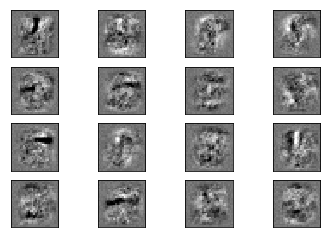

In [6]:
# MNIST classifier using scikit-learn

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

df = pd.read_csv('https://bit.ly/3ilJc2C', compression='zip', delimiter=',')

# extract input variables with some linear scaling on RGB data
X = (df.values[:, :-1]/ 255.0)
Y = df.values[:, -1]

# get a count of each group to ensure samples are equitably balanced
print(df.groupby(['class']).agg({'class' : [np.size]}))

# separate training and testing datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3, random_state=10, stratify=Y)

NN = MLPClassifier(solver='sgd',
                  hidden_layer_sizes=(100, ),
                  activation='logistic',
                  max_iter=480,
                  learning_rate_init=0.1)

NN.fit(X_train, Y_train)


# display the heatmap
fig, axes = plt.subplots(4,4)

# use global min/max to ensure all weights are shown on the same scale
vmin, vmax = NN.coefs_[0].min(), NN.coefs_[0].max()

for coef, ax in zip(NN.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28,28), cmap=plt.cm.gray, vmin=0.5*vmin, vmax=0.5*vmax)
    ax.set_xticks(())
    ax.set_yticks(())
    
plt.show()